In [6]:
from pandas import DataFrame, read_csv, to_datetime

# cargar data y revisar valores faltantes y tipos de datos
raw_superstore = read_csv("../data/raw/Sample - Superstore.csv", encoding="latin1")

# revisar estructura general del DataFrame
display(raw_superstore.info())
display(raw_superstore.describe())
print("")
""" Excelente observación 💡 — ese valor negativo en Profit (−6599.978) nos dice que hay pedidos con pérdidas fuertes.
Esto es totalmente válido en ventas: descuentos altos o costos de envío pueden generar pérdidas.
Pero sí conviene investigar si son casos reales o errores más adelante. """

# revisar correlaciones entre variables numéricas
""" ¿Qué te muestra entre Discount y Profit?
¿Es una correlación negativa (por ejemplo, −0.2 o menor)? """
display(raw_superstore[['Sales', 'Profit', 'Discount', 'Quantity']].corr())
print(""" Mira lo que eso nos dice:

Sales y Profit tienen correlación positiva (0.48) → cuando las ventas suben, las ganancias también, como es de esperar.

Discount y Profit tienen correlación negativa (−0.22) → los descuentos reducen la ganancia, lo cual tiene sentido.

Quantity tiene poca relación con todo → vender más unidades no siempre implica más beneficio. """)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


 Mira lo que eso nos dice:

Sales y Profit tienen correlación positiva (0.48) → cuando las ventas suben, las ganancias también, como es de esperar.

Discount y Profit tienen correlación negativa (−0.22) → los descuentos reducen la ganancia, lo cual tiene sentido.

Quantity tiene poca relación con todo → vender más unidades no siempre implica más beneficio. 


In [7]:
# limpieza y transformación de datos aquí
staging_superstore = raw_superstore.copy()
# convertir columnas de fecha a tipo datetime
staging_superstore[['Order Date', 'Ship Date']] = staging_superstore[['Order Date', 'Ship Date']].apply(to_datetime)

display(staging_superstore[['Order Date', 'Ship Date']].info())
display(staging_superstore.isnull().sum())

# Diferencia de días entre pedido y envío
staging_superstore["Shipping Days"] = (staging_superstore["Ship Date"] - staging_superstore["Order Date"]).dt.days

# Año del pedido
staging_superstore["Order Year"] = staging_superstore["Order Date"].dt.year

# Mes del pedido (en texto)
staging_superstore["Order Month"] = staging_superstore["Order Date"].dt.strftime("%B")

display(staging_superstore.head())

# guardar data limpia y transformada
staging_superstore.to_csv("../data/staging/staging_superstore.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.3 KB


None

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,October


In [8]:
# análisis exploratorio de datos (EDA) aquí
# Ventas y ganancias por año
""" 👉 Pregunta:
¿Notas un crecimiento o una caída entre años?
(Cuéntame los valores que ves, y te guío a interpretarlos). """
display(staging_superstore.groupby("Order Year")[["Sales", "Profit"]].sum().sort_index().reset_index())
""" Excelente interpretación 👏

Tu lectura es precisa:

Hay una ligera caída en ventas entre 2014 y 2015 (unos $14k menos),

Pero las ganancias aumentan en ese mismo periodo — eso indica mejor eficiencia o márgenes más altos,

Luego, de 2016 a 2017, tanto ventas como ganancias crecen de forma clara 📈

Esto nos da la primera tendencia temporal: el negocio mejora año tras año después de 2015. """

# Ventas y ganancias por categoría
""" 

👉 Cuéntame:
¿Cuál categoría lidera en Sales y cuál tiene mayor Profit?
Así empezamos a detectar cuáles líneas de producto son las más rentables. """
display(staging_superstore.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).reset_index())
""" Mira cómo se puede interpretar eso:

🖥️ Technology domina tanto en ventas como ganancias,
→ significa que sus márgenes son sólidos y la demanda alta.

🪑 Furniture vende bastante, pero genera poca ganancia,
→ puede haber costos altos de envío o descuentos frecuentes.

✏️ Office Supplies tiene ventas similares a Furniture, pero con mejor rentabilidad.

- La línea tecnológica impulsa el negocio, mientras que muebles tienen problemas de margen.
 """

#  top 5 estados con mayor venta total
display(    staging_superstore.groupby("State")["Sales"].sum().sort_values(ascending=False).head(5).reset_index()
)


,Order Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


,Category,Sales,Profit
0,Technology,836154.0330,145454.9481
1,Furniture,741999.7953,18451.2728
2,Office Supplies,719047.0320,122490.8008


,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


Entonces, observemos el patrón:

California domina claramente (más de 450 k USD).

Luego vienen New York y Texas, pero con una brecha grande.

Esto muestra que las ventas están concentradas en pocas regiones — un patrón muy común en este dataset.

Ya tienes insights claros de esta etapa 👇
✅ Crecimiento anual sostenido después de 2015
✅ Tecnología = motor principal de ventas y rentabilidad
✅ Concentración geográfica (California y NY)

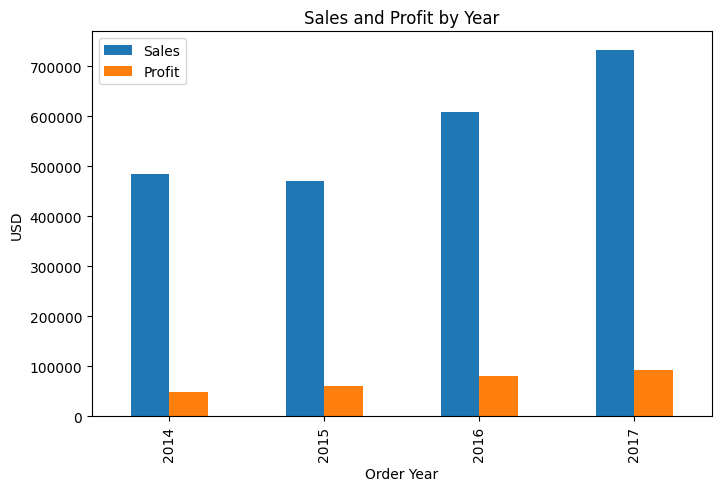

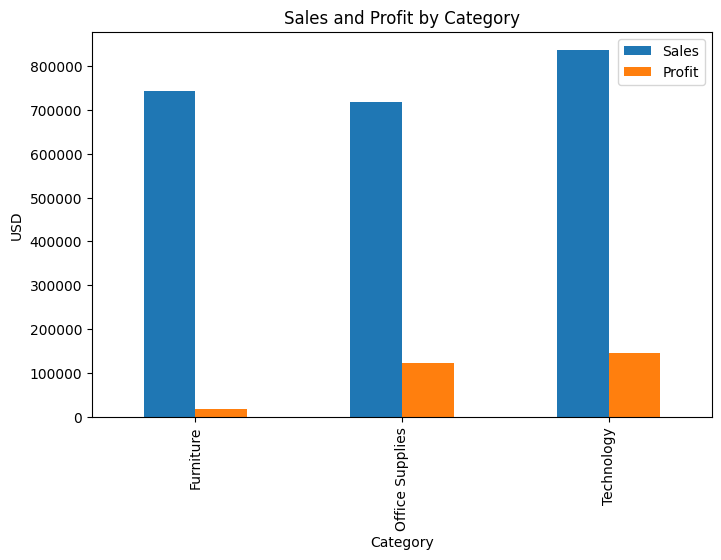

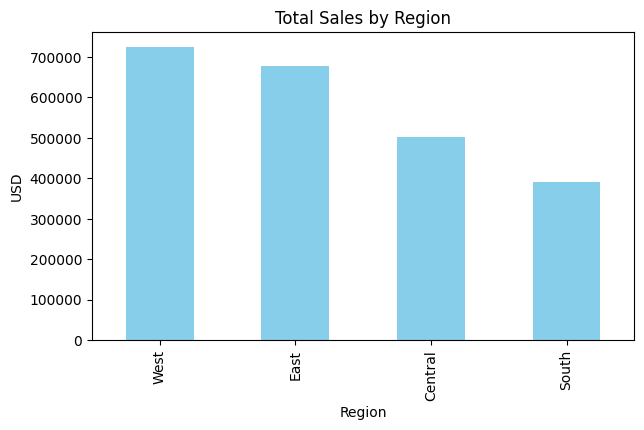

In [9]:
from matplotlib.pyplot import show, title, ylabel

sales_profit_year= staging_superstore.groupby("Order Year")[["Sales", "Profit"]].sum()

sales_profit_year.plot(kind="bar", figsize=(8,5))
title("Sales and Profit by Year")
ylabel("USD")
show()

# visualizaciones por ganancia y categoría
sales_profit_cat = staging_superstore.groupby("Category")[["Sales", "Profit"]].sum()
sales_profit_cat.plot(kind="bar", figsize=(8,5))
title("Sales and Profit by Category")
ylabel("USD")
show()

# ventas por región
region_sales = staging_superstore.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", color="skyblue", figsize=(7,4))
title("Total Sales by Region")
ylabel("USD")
show()


Vamos a redactarlas brevemente. Te propongo esta estructura:

Resumen de hallazgos clave (qué descubriste).

Interpretación (qué significan).

Recomendaciones (qué podría hacer la empresa).

Por ejemplo, podríamos comenzar así:

Conclusiones:

Las ventas y ganancias crecieron consistentemente de 2015 a 2017.

La categoría Technology genera la mayor parte del beneficio.

La región West (especialmente California) concentra las ventas más altas.

La categoría Furniture tiene ventas altas, pero márgenes bajos.